In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import requests

# API de saúde mental
mental_health_url = "https://ghoapi.azureedge.net/api/MH_12"
mental_health_response = requests.get(mental_health_url)
mental_health_data = mental_health_response.json()['value']
df_mental_health = pd.DataFrame(mental_health_data)

# API de índices econômicos
econ_url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD;NY.GDP.PCAP.CD;SL.UEM.TOTL.ZS;FP.CPI.TOTL.ZG;SP.POP.TOTL?date=2013:2023&format=json&per_page=20000&source=2"
econ_response = requests.get(econ_url)
econ_data = econ_response.json()[1]
df_econ = pd.DataFrame(econ_data)

In [52]:
df_econ.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal,scale
0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,1.245472e+12,,,0,NaN
1,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,1.191423e+12,,,0,NaN
2,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,1.085745e+12,,,0,NaN
3,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,9.333918e+11,,,0,NaN
4,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,1.009721e+12,,,0,NaN


In [53]:
# Normalizando os campos aninhados
df_econ_flat = pd.json_normalize(df_econ.to_dict(orient='records'))

# Selecionando apenas os campos desejados
df_econ_final = df_econ_flat[['country.value', 'indicator.id', 'indicator.value', 'date', 'value']]

# Renomeando para facilitar
df_econ_final = df_econ_final.rename(columns={
    'country.value': 'pais',
    'indicator.id': 'indicador_id',
    'indicator.value': 'indicador_nome',
    'date': 'ano',
    'value': 'valor'
})

df_econ_final.head()

,pais,indicador_id,indicador_nome,ano,valor
0,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2023,1.245472e+12
1,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2022,1.191423e+12
2,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2021,1.085745e+12
3,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2020,9.333918e+11
4,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2019,1.009721e+12


In [54]:
df_econ_final['pais'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle in

In [55]:
# Atualiza variável df_econ com o DataFrame final
df_econ = df_econ_final

In [56]:
df_econ['indicador_nome'].unique()


array(['GDP (current US$)', 'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)', 'Population, total'],
      dtype=object)

In [57]:
indicadores_pt = {
    'GDP (current US$)': 'PIB US$',
    'GDP per capita (current US$)': 'PIB per capita US$',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Desemprego (%)',
    'Inflation, consumer prices (annual %)': 'Inflação (%)',
    'Population, total': 'População'
}

df_econ['indicador_nome'] = df_econ['indicador_nome'].replace(indicadores_pt)
df_econ['indicador_nome'].unique()

array(['PIB US$', 'PIB per capita US$', 'Desemprego (%)', 'Inflação (%)',
       'População'], dtype=object)

In [58]:
df_mental_health.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,1325557,MH_12,WORLDBANKINCOMEGROUP,WB_LI,YEAR,None,None,SEX,SEX_FMLE,2021,...,None,5.5 [3.0-9.0],5.46583,3.00298,8.96102,None,2025-01-28T14:13:24.673+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
1,1325802,MH_12,COUNTRY,AGO,YEAR,AFR,Africa,SEX,SEX_BTSX,2017,...,None,11.9 [7.2-17.3],11.88435,7.22470,17.27148,None,2025-01-28T14:13:24.673+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
2,1325952,MH_12,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,SEX_FMLE,2007,...,None,7.1 [4.1-10.8],7.12896,4.11283,10.79988,None,2025-01-28T14:13:24.673+01:00,2007,2007-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00
3,1326513,MH_12,COUNTRY,MDV,YEAR,SEAR,South-East Asia,SEX,SEX_BTSX,2006,...,None,3.2 [2.1-4.5],3.15935,2.09685,4.54676,None,2025-01-28T14:13:24.673+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00
4,1327008,MH_12,COUNTRY,MDG,YEAR,AFR,Africa,SEX,SEX_MLE,2020,...,None,15.9 [9.6-25.1],15.94784,9.58954,25.12363,None,2025-01-28T14:13:24.673+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00


In [59]:
### Coluna - Descrição
# Id                        - Identificador único do registro
# IndicatorCode	            - Código do indicador (MH_12 = suicídio)
# SpatialDimType            - Tipo de dimensão espacial (ex: COUNTRY)
# SpatialDim                - Código do país (ex: BRA, USA, etc.)
# TimeDimType               - Tipo de dimensão temporal (ex: YEAR)
# ParentLocationCode        - Código da região (ex: AMR = Americas)
# ParentLocation            - Nome da região (ex: Americas, Europe, Africa)
# Dim1Type                  - Tipo da dimensão 1 (ex: SEX)
# TimeDim                   - Ano da observação
# Dim1                      - Valor da dimensão 1 (ex: SEX_MLE = masculino, SEX_FMLE = feminino)
# Value	                    - Valor da taxa de suicídios por 100 mil habitantes no país (ex: "1.7 [1.0-2.5]")
# NumericValue              - Valor numérico central (ex: 1.68139)
# Low                       - Limite inferior do intervalo de confiança
# High                      - Limite superior do intervalo de confiança
# Comments                  - Comentários (geralmente None)
# Date                      - Data de atualização
# TimeDimensionValue        - Ano (igual ao TimeDim)
# TimeDimensionBegin        - Data de início do período
# TimeDimensionEnd          - Data de fim do período

In [60]:
df_mental_health['SpatialDimType'].unique()

array(['WORLDBANKINCOMEGROUP', 'COUNTRY', 'REGION', 'GLOBAL'],
      dtype=object)

In [61]:
df_saude_mental = df_mental_health.rename(columns={
    'SpatialDimType': 'tipo_dimensao_espacial',
    'SpatialDim': 'dimensao_espacial',
    'TimeDimType': 'tipo_dimensao_temporal',
    'TimeDim': 'dimensao_temporal',
    'ParentLocation': 'regiao',
    'Dim1': 'sexo',
    'NumericValue': 'taxa_sui_100k_hab',
    'Low': 'Lim_inf',
    'High': 'Lim_sup'
})[
    ['tipo_dimensao_espacial', 'dimensao_espacial', 'tipo_dimensao_temporal', 
     'dimensao_temporal', 'regiao', 'sexo', 'taxa_sui_100k_hab', 'Lim_inf', 'Lim_sup']
]

df_saude_mental.head()

,tipo_dimensao_espacial,dimensao_espacial,tipo_dimensao_temporal,dimensao_temporal,regiao,sexo,taxa_sui_100k_hab,Lim_inf,Lim_sup
0,WORLDBANKINCOMEGROUP,WB_LI,YEAR,2021,None,SEX_FMLE,5.46583,3.00298,8.96102
1,COUNTRY,AGO,YEAR,2017,Africa,SEX_BTSX,11.88435,7.22470,17.27148
2,COUNTRY,WSM,YEAR,2007,Western Pacific,SEX_FMLE,7.12896,4.11283,10.79988
3,COUNTRY,MDV,YEAR,2006,South-East Asia,SEX_BTSX,3.15935,2.09685,4.54676
4,COUNTRY,MDG,YEAR,2020,Africa,SEX_MLE,15.94784,9.58954,25.12363


In [62]:
df_saude_mental['sexo'].unique()

array(['SEX_FMLE', 'SEX_BTSX', 'SEX_MLE'], dtype=object)

In [63]:
# Facilita a leitura dos dados de sexo
df_saude_mental['sexo'] = df_saude_mental['sexo'].replace({
    'SEX_FMLE': 'F',
    'SEX_MLE': 'M',
    'SEX_BTSX': 'Ambos'
})

df_saude_mental['sexo'].unique()

array(['F', 'Ambos', 'M'], dtype=object)

In [64]:
import pycountry

def codigo_para_nome(codigo):
    try:
        return pycountry.countries.get(alpha_3=codigo).name
    except:
        return None

df_saude_mental['nome_pais'] = df_saude_mental['dimensao_espacial'].apply(codigo_para_nome)
df_saude_mental[['dimensao_espacial', 'nome_pais']].head()

,dimensao_espacial,nome_pais
0,WB_LI,None
1,AGO,Angola
2,WSM,Samoa
3,MDV,Maldives
4,MDG,Madagascar


In [65]:
# df_saude_mental[(df_saude_mental['nome_pais'].isnull()) & (df_saude_mental['tipo_dimensao_espacial'] == 'COUNTRY')]
# retorna vazio pois todos os códigos de países estão corretos

In [66]:
df_saude_mental[df_saude_mental['dimensao_espacial'] == 'GLOBAL']

,tipo_dimensao_espacial,dimensao_espacial,tipo_dimensao_temporal,dimensao_temporal,regiao,sexo,taxa_sui_100k_hab,Lim_inf,Lim_sup,nome_pais
329,GLOBAL,GLOBAL,YEAR,2004,None,M,17.40762,14.38097,20.14391,None
415,GLOBAL,GLOBAL,YEAR,2009,None,Ambos,11.15438,8.97744,13.07723,None
506,GLOBAL,GLOBAL,YEAR,2013,None,Ambos,10.21287,8.17427,12.10611,None
576,GLOBAL,GLOBAL,YEAR,2016,None,F,6.01072,4.42521,7.50321,None
725,GLOBAL,GLOBAL,YEAR,2019,None,M,13.09098,10.45372,15.97413,None
...,...,...,...,...,...,...,...,...,...,...
11988,GLOBAL,GLOBAL,YEAR,2002,None,M,17.80860,14.65765,20.49788,None
12317,GLOBAL,GLOBAL,YEAR,2012,None,M,14.42000,12.00853,16.84550,None
12359,GLOBAL,GLOBAL,YEAR,2014,None,F,6.26830,4.65076,7.71961,None
12731,GLOBAL,GLOBAL,YEAR,2011,None,Ambos,10.69536,8.57758,12.62006,None


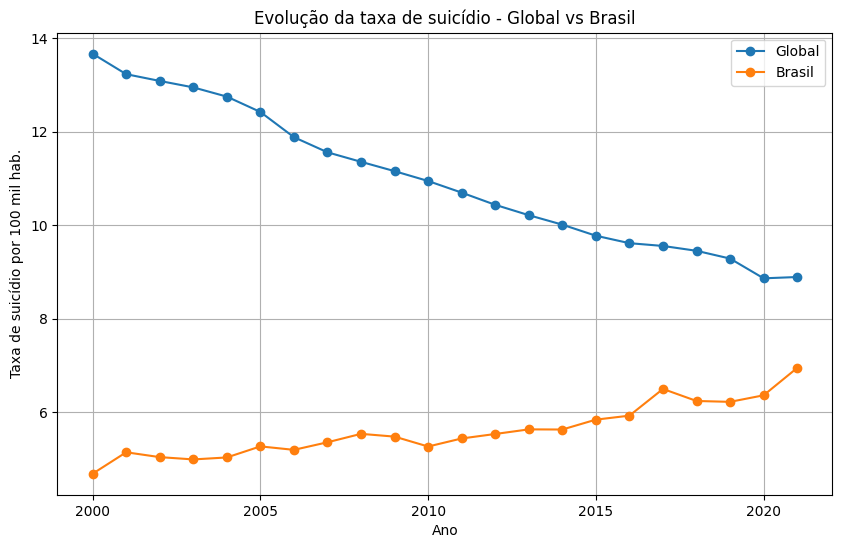

In [67]:
df_global = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'GLOBAL') & (df_saude_mental['sexo'] == 'Ambos')]
df_brasil = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'Ambos')]

df_global = df_global.sort_values('dimensao_temporal')
df_brasil = df_brasil.sort_values('dimensao_temporal')

plt.figure(figsize=(10,6))
plt.plot(df_global['dimensao_temporal'], df_global['taxa_sui_100k_hab'], marker='o', label='Global')
plt.plot(df_brasil['dimensao_temporal'], df_brasil['taxa_sui_100k_hab'], marker='o', label='Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Evolução da taxa de suicídio - Global vs Brasil')
plt.legend()
plt.grid(True)
plt.show()

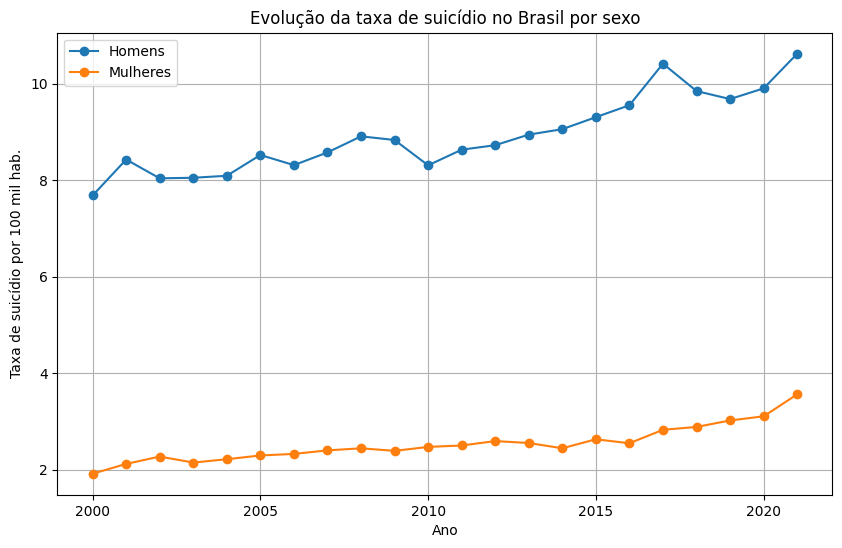

In [68]:
df_brasil_m = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'M')]
df_brasil_f = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'F')]

df_brasil_m = df_brasil_m.sort_values('dimensao_temporal')
df_brasil_f = df_brasil_f.sort_values('dimensao_temporal')

plt.figure(figsize=(10,6))
plt.plot(df_brasil_m['dimensao_temporal'], df_brasil_m['taxa_sui_100k_hab'], marker='o', label='Homens')
plt.plot(df_brasil_f['dimensao_temporal'], df_brasil_f['taxa_sui_100k_hab'], marker='o', label='Mulheres')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Evolução da taxa de suicídio no Brasil por sexo')
plt.legend()
plt.grid(True)
plt.show()

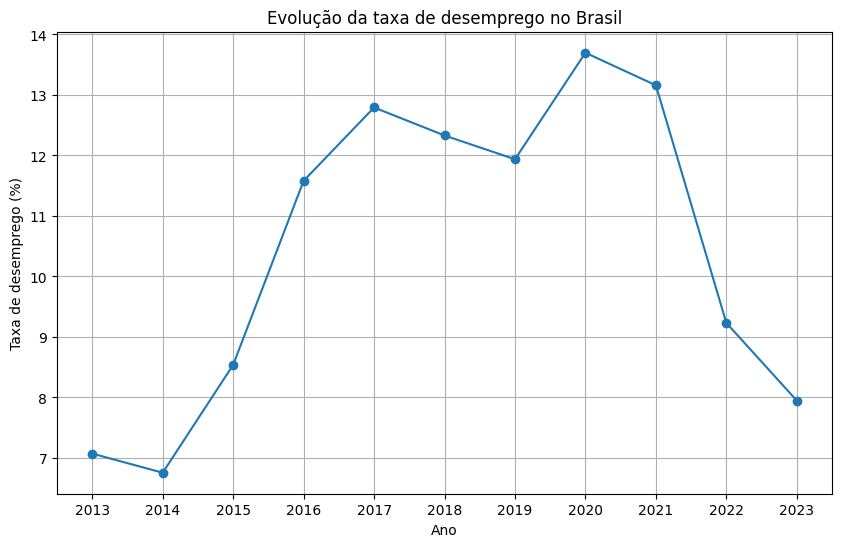

In [71]:
# Filtra desemprego no Brasil
df_desemprego_brasil = df_econ[
    (df_econ['indicador_nome'].str.contains('Desemprego', case=False)) &
    (df_econ['pais'] == 'Brazil')
].sort_values('ano')

plt.figure(figsize=(10,6))
plt.plot(df_desemprego_brasil['ano'], df_desemprego_brasil['valor'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Taxa de desemprego (%)')
plt.title('Evolução da taxa de desemprego no Brasil')
plt.grid(True)
plt.show()

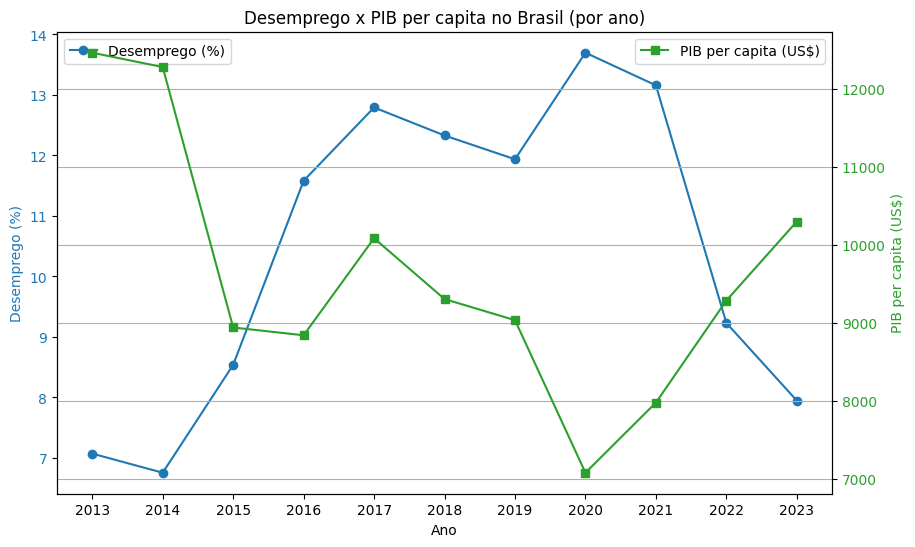

In [76]:
# Filtra desemprego e PIB per capita para o Brasil
df_desemprego = df_econ[
    (df_econ['indicador_nome'] == 'Desemprego (%)') &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'desemprego'}).sort_values('ano')

df_pib_per_capita = df_econ[
    (df_econ['indicador_nome'] == 'PIB per capita US$') &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'pib_per_capita'}).sort_values('ano')

# Junta os dois dataframes pelo ano
df_plot = pd.merge(df_desemprego, df_pib_per_capita, on='ano')

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Desemprego (%)', color=color)
ax1.plot(df_plot['ano'], df_plot['desemprego'], marker='o', color=color, label='Desemprego (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('PIB per capita (US$)', color=color)
ax2.plot(df_plot['ano'], df_plot['pib_per_capita'], marker='s', color=color, label='PIB per capita (US$)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Desemprego x PIB per capita no Brasil (por ano)')
plt.grid(True)
plt.show()

In [74]:
df_desemprego['ano'] = df_desemprego['ano'].astype(str)
df_pib_per_capita['ano'] = df_pib_per_capita['ano'].astype(str)

# Junta novamente
df_merged = pd.merge(df_desemprego, df_pib_per_capita, on='ano', suffixes=('_desemprego', '_pib'))

print(df_merged.shape)
print(df_merged.columns)
print(df_merged[['ano', 'valor_pib', 'valor_desemprego']])

(0, 9)
Index(['pais_desemprego', 'indicador_id_desemprego',
       'indicador_nome_desemprego', 'ano', 'valor_desemprego', 'pais_pib',
       'indicador_id_pib', 'indicador_nome_pib', 'valor_pib'],
      dtype='object')
Empty DataFrame
Columns: [ano, valor_pib, valor_desemprego]
Index: []


C:\Users\igori\AppData\Local\Temp\ipykernel_11704\3822501286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desemprego['ano'] = df_desemprego['ano'].astype(str)
